In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("ml_experiment_results.csv")


## Compare Performance Across Datasets


### Accuracy by Model and Dataset


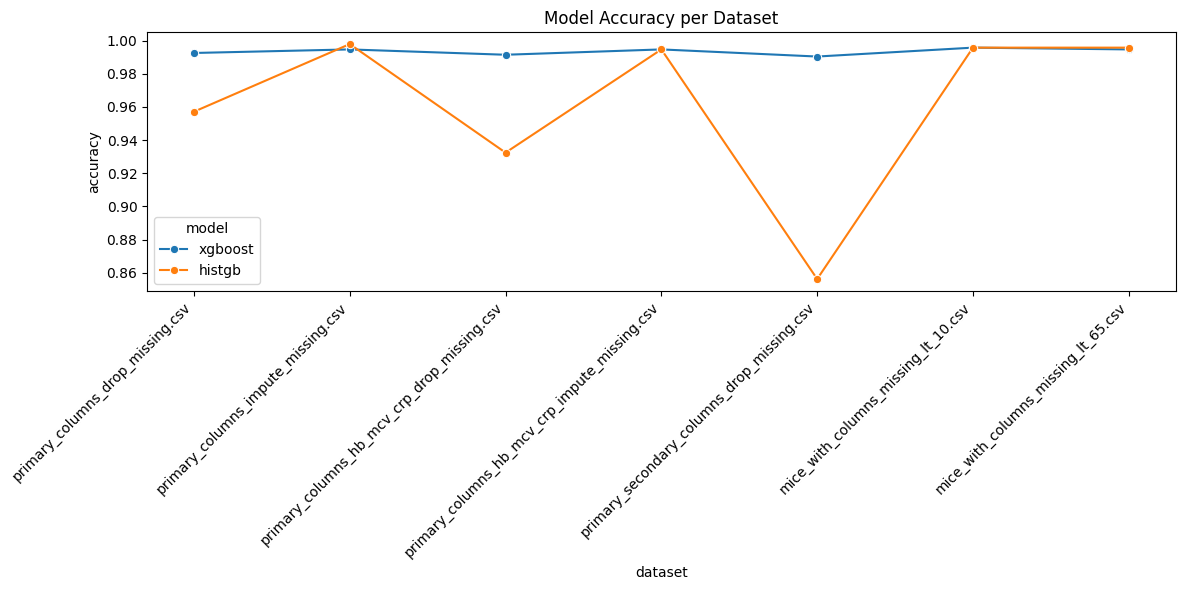

In [30]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="dataset", y="accuracy", hue="model", marker="o")
plt.xticks(rotation=45, ha="right")
plt.title("Model Accuracy per Dataset")
plt.tight_layout()
plt.show()


### Macro F1

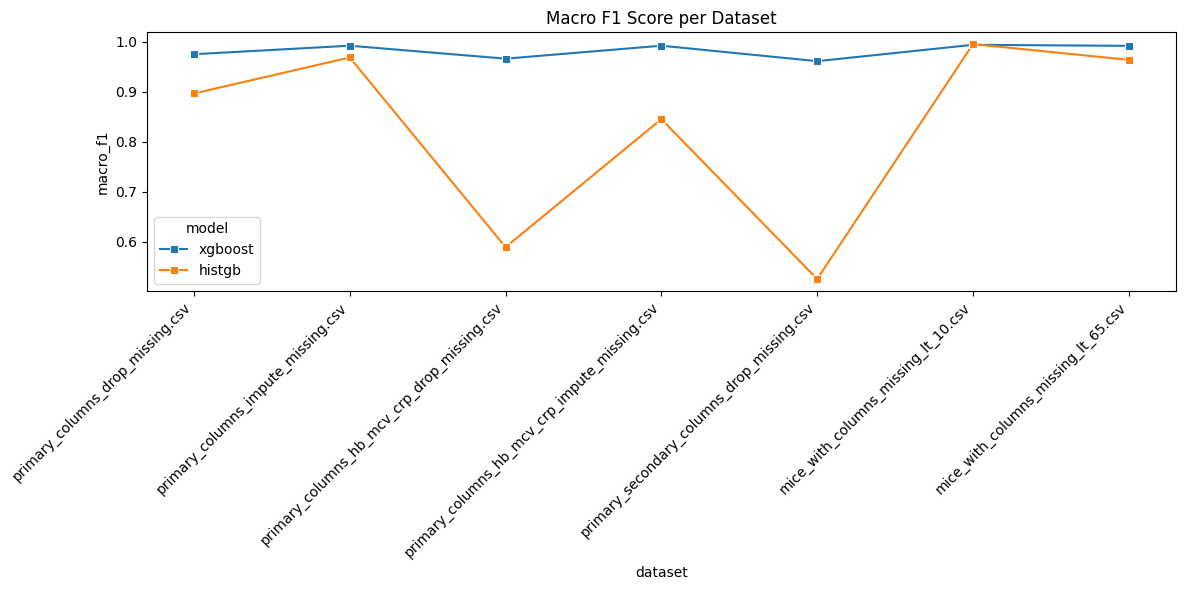

In [31]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="dataset", y="macro_f1", hue="model", marker="s")
plt.xticks(rotation=45, ha="right")
plt.title("Macro F1 Score per Dataset")
plt.tight_layout()
plt.show()


## Compare All Models per Dataset


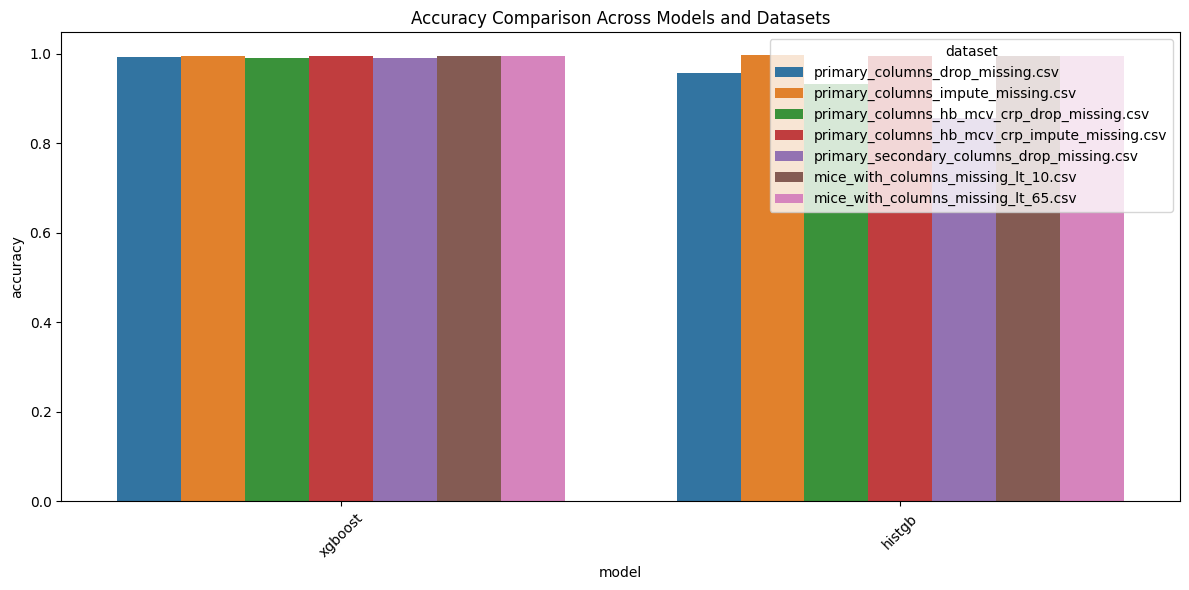

In [32]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x="model", y="accuracy", hue="dataset")
plt.title("Accuracy Comparison Across Models and Datasets")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Accuracy Table

### Pivot and Heatmap


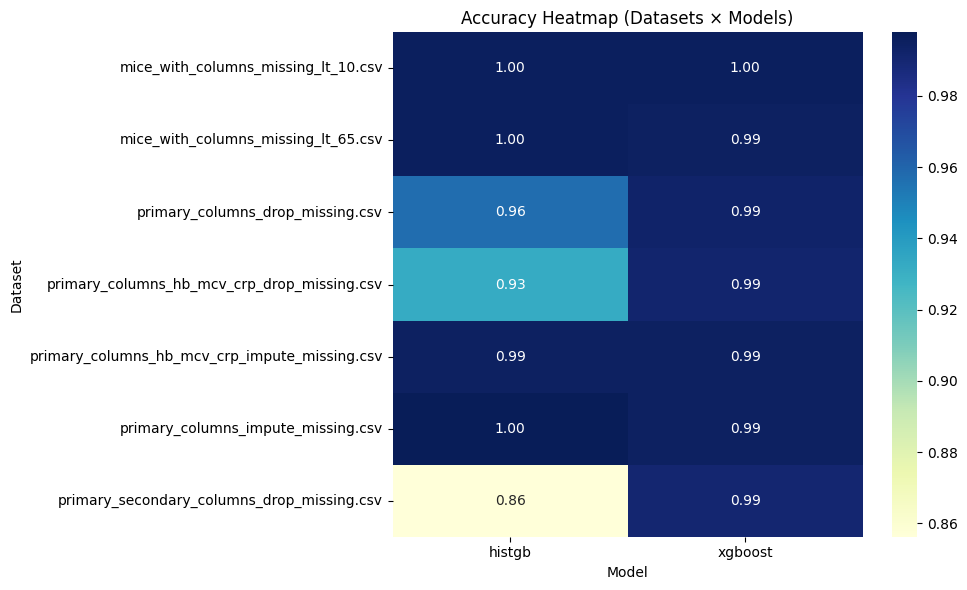

In [33]:
pivot_acc = df.pivot(index="dataset", columns="model", values="accuracy")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_acc, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Accuracy Heatmap (Datasets × Models)")
plt.ylabel("Dataset")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


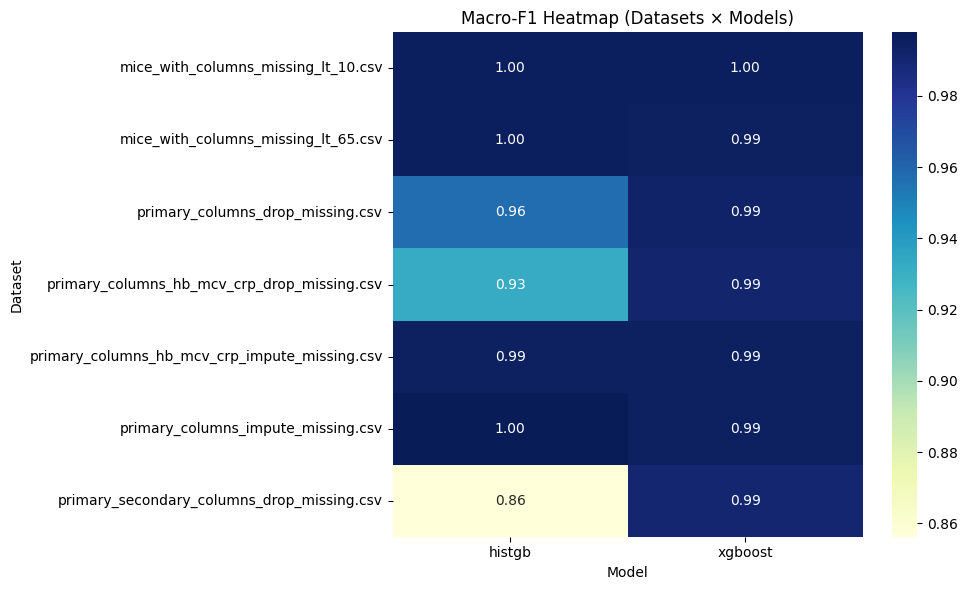

In [34]:
pivot_macro_f1 = df.pivot(index="dataset", columns="model", values="macro_f1")
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_acc, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Macro-F1 Heatmap (Datasets × Models)")
plt.ylabel("Dataset")
plt.xlabel("Model")
plt.tight_layout()
plt.show()


## Results 

/var/folders/5f/7zn60cf53sxc74yn0mv8wdf80000gn/T/ipykernel_54506/12093911.py:38: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches="tight", dpi=300)
/Users/galactica/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


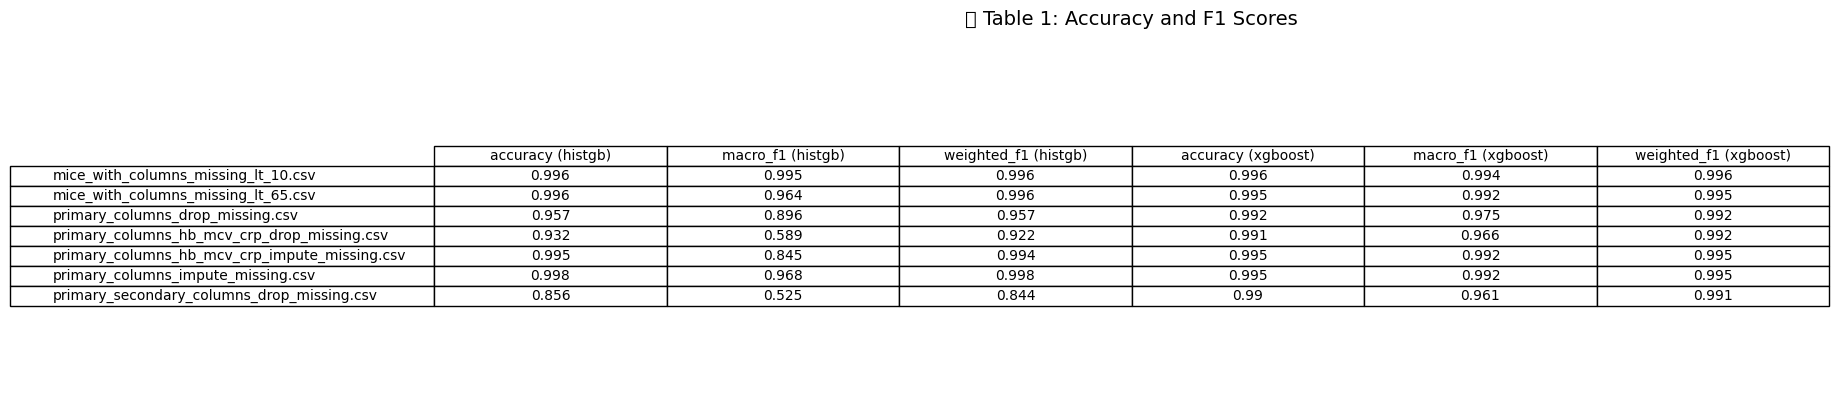

/var/folders/5f/7zn60cf53sxc74yn0mv8wdf80000gn/T/ipykernel_54506/12093911.py:38: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.savefig(filename, bbox_inches="tight", dpi=300)
/Users/galactica/miniconda3/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


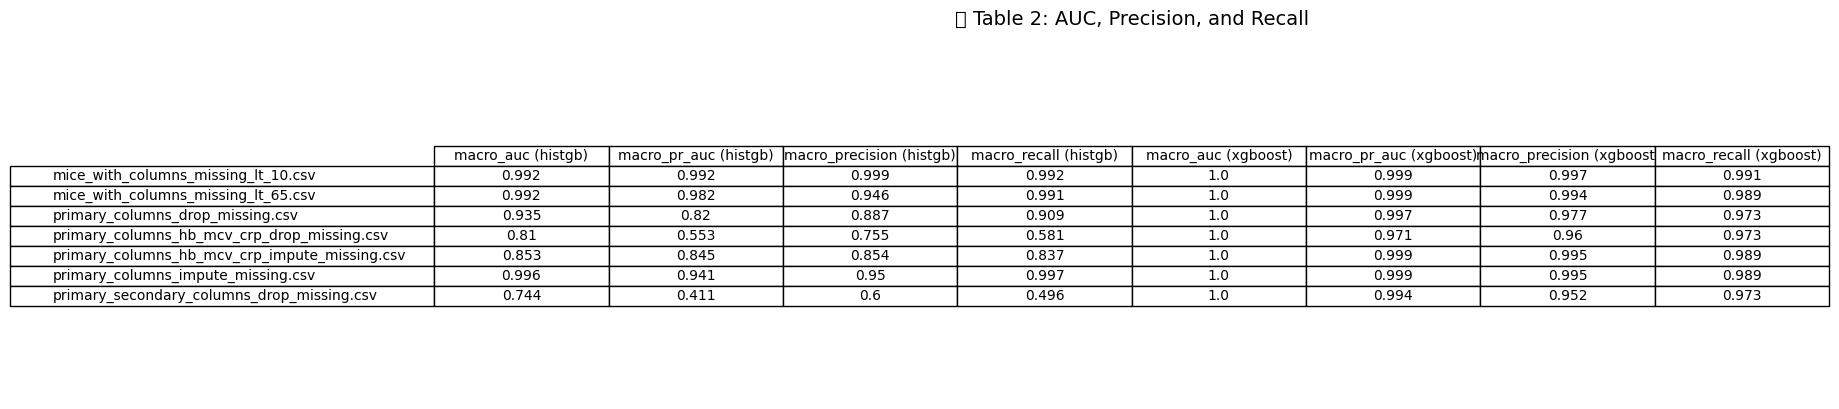

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and round metrics
df = pd.read_csv("ml_experiment_results.csv")
metrics_1 = ["accuracy", "macro_f1", "weighted_f1"]
metrics_2 = ["macro_auc", "macro_pr_auc", "macro_precision", "macro_recall"]
all_metrics = metrics_1 + metrics_2
df[all_metrics] = df[all_metrics].round(3)

# Prepare table 1
table1 = df.pivot(index="dataset", columns="model")[metrics_1]
table1 = table1.swaplevel(axis=1).sort_index(axis=1)
str_table1 = table1.copy().astype(str)

# Prepare table 2
table2 = df.pivot(index="dataset", columns="model")[metrics_2]
table2 = table2.swaplevel(axis=1).sort_index(axis=1)
str_table2 = table2.copy().astype(str)

def plot_table(str_table, title, filename):
    fig, ax = plt.subplots(figsize=(15, len(str_table) * 0.5 + 1))
    ax.axis('off')
    plt.title(title, fontsize=14, pad=20)
    
    # Table
    mpl_table = ax.table(cellText=str_table.values,
                         rowLabels=str_table.index,
                         colLabels=["{} ({})".format(metric, model)
                                    for model, metric in str_table.columns],
                         cellLoc='center',
                         loc='center')
    
    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(10)
    mpl_table.scale(1.2, 1.2)
    
    plt.savefig(filename, bbox_inches="tight", dpi=300)
    plt.show()

# Plot both tables
plot_table(str_table1, "📊 Table 1: Accuracy and F1 Scores", "table1_accuracy_f1.png")
plot_table(str_table2, "📈 Table 2: AUC, Precision, and Recall", "table2_auc_precision_recall.png")
